# Example 3

This notebook computes total decay rates for a few models

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import numpy as np

import DarkNews as dn
from DarkNews import *

In [3]:
import ToyAnalysis as ta

In [5]:
from DarkNews.GenLauncher import GenLauncher
kwargs={'m5': 0.15, 'm4': 0.1, 'mzprime': 1.25,'Umu5': 1.6e-3, 'Umu4': 0.0}
# kwargs={'m5': 0.15, 'm4': 0.075, 'mzprime': 1.25,'Umu5': 0.0, 'Umu4': 0.0, 'theta': 0.9e-1, 's_mu5': 1e-1, 'mhprime': 1.0}
gen_object = GenLauncher(exp="miniboone_fhc", HNLtype='dirac', loglevel="WARNING", neval=1e4, **kwargs)
df=gen_object.run()

Directory tree for this run already exists. Overriding it.


In [9]:
for i in range(4):
    df['P_decay_ellell',i] = df['P_decay_ell_minus',f'{i}']+df['P_decay_ell_plus',f'{i}']
        

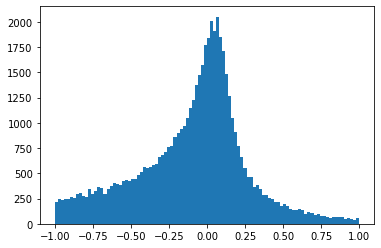

In [14]:
import DarkNews.fourvec as fv
_=plt.hist(fv.df_cos_opening_angle(df['P_decay_ellell'], df['P_recoil']), bins=100)

In [19]:
# ta.plot_tools.plot_all_rates(df, case_name='example_3/rate', Nevents=None, loc='')
ta.plot_tools.batch_plot(df, 'plots/example_3/', title='DarKNews')

### MiniBooNE efficiencies


In [ ]:
eff_func = scipy.interpolate.interp1d(enu_c, eff, fill_value=(eff[0],eff[-1]), bounds_error=False, kind='nearest')

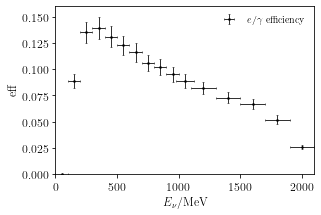

In [ ]:
fig,ax = ta.plot_tools.std_fig()
enu_c, eff, err_eff = np.genfromtxt("aux_data/miniboone_eff/eg_effs.dat",unpack=True)
enu_w = (np.append(enu_c[1:],2200)-enu_c)


kwargs={'facecolor': 'dodgerblue', 'edgecolor': 'None'}
ta.plot_tools.data_plot(ax, enu_c, enu_w, eff, err_eff/2, err_eff/2, label=r'$e/\gamma$ efficiency')
# ta.plot_tools.errorband_plot(ax, enu_c, enu_w, eff, err_eff/2, err_eff/2, label=r'$e/\gamma$ efficiency', **kwargs)
ax.legend(loc='upper right', )

ax.set_ylim(0,0.160)
ax.set_xlim(0,2100)
ax.set_xlabel(r"$E_\nu/$MeV")
ax.set_ylabel(r"eff")

ta.plot_tools.std_savefig(fig, 'plots/miniboone_effs.pdf')

In [23]:
T=1.6e-4 # eV

mnu = np.sqrt(2e-3) # eV
N_nu = 300 # nus/cm^3 
convert = dn.const.invcm3_to_eV3 # cm^-3 --> eV^3

print(f"\delta m_phi/y_phi = {np.sqrt(N_nu*convert/mnu):.2g} eV")

\delta m_phi/y_phi = 7.2e-06 eV


In [123]:
mphi = 1e-14
print(f"delta m_nu = {1e-20*0.3e9/mphi*dn.const.invcm3_to_eV3/mnu**2:.2g} eV")

delta m_nu = 1.2e-09 eV
